In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
def load_data():
    orig_data = pd.read_excel("OppScrData.xlsx")
    for col in orig_data.columns:
      new_col = '_'.join(col.split())

      if new_col.startswith('Unnamed'):
        orig_data.drop(col, axis = 1, inplace=True)
      else:
        orig_data.rename(columns={col:new_col}, inplace=True)
    
    return orig_data

In [3]:
orig_data = load_data()
print(orig_data.columns)

Index(['Record_ID', 'Visit_ID', 'PT_ID', 'Clinical_F/U_interval_[d_from_CT]',
       'BMI', 'BMI_>30', 'Sex', 'Age_at_CT', 'Tobacco', 'Alcohol_abuse',
       'FRS_10-year_risk_(%)', 'FRAX_10y_Fx_Prob_(Orange-w/_DXA)',
       'FRAX_10y_Hip_Fx_Prob_(Orange-w/_DXA)', 'Met_Sx', 'CLINICAL_OUTCOMES',
       'DEATH_[d_from_CT]', 'CVD_DX', 'CVD_DX_Date_[d_from_CT]',
       'Heart_failure_DX', 'Heart_failure_DX_Date_[d_from_CT]', 'MI_DX',
       'MI_DX_Date_[d_from_CT]', 'Type_2_Diabetes_DX',
       'Type_2_Diabetes_DX_Date_[d_from_CT]', 'Femoral_neck_fracture_DX',
       'Femoral_neck_fracture_DX_Date_[d_from_CT]',
       'Unspec_femoral_fracture_DX',
       'Unspec_femoral_fracture_DX_Date_[d_from_CT]', 'Forearm_fracture_DX',
       'Forearm_fracture_DX_Date_[d_from_CT]', 'Humerus_fracture_DX',
       'Humerus_fracture_DX_Date_[d_from_CT]', 'Pathologic_fracture_DX',
       'Pathologic_fracture_DX_Date_[d_from_CT]', 'Alzheimers_DX',
       'Alzheimers_DX_Date_[d_from_CT]', 'Primary_Cancer_Site

In [4]:
CT_cols = orig_data.columns[-11:]
print(CT_cols)

Index(['L1_HU_BMD', 'TAT_Area_(cm2)', 'Total_Body_Area_EA_(cm2)',
       'VAT_Area_(cm2)', 'SAT_Area_(cm2)', 'VAT/SAT_Ratio', 'Muscle_HU',
       'Muscle_Area_(cm2)', 'L3_SMI_(cm2/m2)', 'AoCa_Agatston',
       'Liver_HU_(Median)'],
      dtype='object')


In [5]:
death_col_name = 'DEATH_[d_from_CT]'

# Data Analysis

In [6]:
# filter data into train and test
mask = np.isnan(orig_data[death_col_name]) == False

train_df = orig_data[mask]
test_df = orig_data[~mask]

print(orig_data.shape, train_df.shape, test_df.shape)


(9223, 52) (549, 52) (8674, 52)


In [7]:
train_df[CT_cols].describe(percentiles=[.1, .25, .75, .90, .95, .99])

,L1_HU_BMD,TAT_Area_(cm2),Total_Body_Area_EA_(cm2),VAT_Area_(cm2),SAT_Area_(cm2),VAT/SAT_Ratio,Muscle_HU,Muscle_Area_(cm2),L3_SMI_(cm2/m2),AoCa_Agatston
count,545.000000,533.000000,533.000000,533.000000,533.000000,533.000000,546.000000,546.000000,518.000000,549.000000
mean,150.933945,407.463576,721.280648,212.317173,199.006059,1.220341,20.823904,150.865364,52.222525,2470.798517
std,47.519919,202.357058,244.081176,134.887377,105.992783,0.927551,15.294655,46.480067,14.552679,3572.541978
min,55.000000,20.072442,321.824242,9.363115,9.453488,0.189480,-118.307532,27.922454,10.904482,0.000000
10%,94.000000,161.165469,442.446807,64.231636,80.425405,0.472142,2.253863,94.375155,34.297387,0.000000
25%,113.000000,257.278049,543.067568,115.954610,119.235135,0.663636,11.864264,117.704180,42.560308,131.342000
50%,146.000000,391.636585,682.394595,188.723404,184.651515,0.980474,22.137761,149.117110,51.578709,872.589000
75%,180.000000,526.537838,854.573171,278.625714,260.224242,1.477486,30.875938,185.828842,61.716566,3541.443000
90%,215.600000,666.135520,1057.147415,378.539024,352.840596,2.180368,37.411152,211.053478,70.219430,7080.413800
95%,231.000000,813.951728,1205.916664,470.482791,398.090996,2.693618,42.159653,228.932203,76.057888,9427.202400


In [8]:
train_df['Liver_HU_(Median)'] = pd.to_numeric(train_df['Liver_HU_(Median)'], errors='coerce')
train_df['Liver_HU_(Median)'] = train_df['Liver_HU_(Median)'].astype(float)

test_df['Liver_HU_(Median)'] = pd.to_numeric(test_df['Liver_HU_(Median)'], errors='coerce')
test_df['Liver_HU_(Median)'] = test_df['Liver_HU_(Median)'].astype(float)

print(train_df.dtypes)

Record_ID                                        int64
Visit_ID                                         int64
PT_ID                                            int64
Clinical_F/U_interval_[d_from_CT]                int64
BMI                                            float64
BMI_>30                                         object
Sex                                             object
Age_at_CT                                        int64
Tobacco                                         object
Alcohol_abuse                                   object
FRS_10-year_risk_(%)                            object
FRAX_10y_Fx_Prob_(Orange-w/_DXA)                object
FRAX_10y_Hip_Fx_Prob_(Orange-w/_DXA)            object
Met_Sx                                          object
CLINICAL_OUTCOMES                              float64
DEATH_[d_from_CT]                              float64
CVD_DX                                          object
CVD_DX_Date_[d_from_CT]                        float64
Heart_fail

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [9]:
train_df[CT_cols].describe()

,L1_HU_BMD,TAT_Area_(cm2),Total_Body_Area_EA_(cm2),VAT_Area_(cm2),SAT_Area_(cm2),VAT/SAT_Ratio,Muscle_HU,Muscle_Area_(cm2),L3_SMI_(cm2/m2),AoCa_Agatston,Liver_HU_(Median)
count,545.000000,533.000000,533.000000,533.000000,533.000000,533.000000,546.000000,546.000000,518.000000,549.000000,536.000000
mean,150.933945,407.463576,721.280648,212.317173,199.006059,1.220341,20.823904,150.865364,52.222525,2470.798517,53.554104
std,47.519919,202.357058,244.081176,134.887377,105.992783,0.927551,15.294655,46.480067,14.552679,3572.541978,10.775225
min,55.000000,20.072442,321.824242,9.363115,9.453488,0.189480,-118.307532,27.922454,10.904482,0.000000,-21.000000
25%,113.000000,257.278049,543.067568,115.954610,119.235135,0.663636,11.864264,117.704180,42.560308,131.342000,49.750000
50%,146.000000,391.636585,682.394595,188.723404,184.651515,0.980474,22.137761,149.117110,51.578709,872.589000,56.000000
75%,180.000000,526.537838,854.573171,278.625714,260.224242,1.477486,30.875938,185.828842,61.716566,3541.443000,60.000000
max,359.000000,1046.928378,1641.385621,837.921569,603.846911,10.827769,73.980641,280.415981,117.735193,31723.945000,105.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


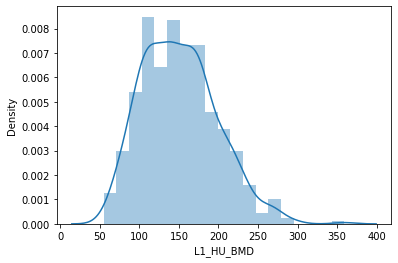

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


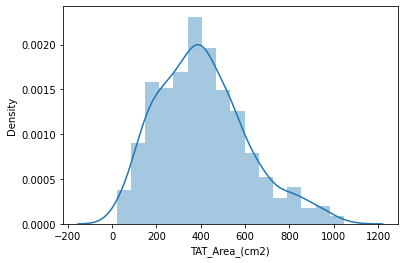

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


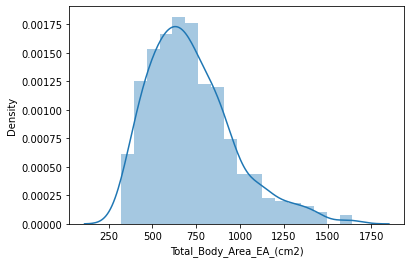

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


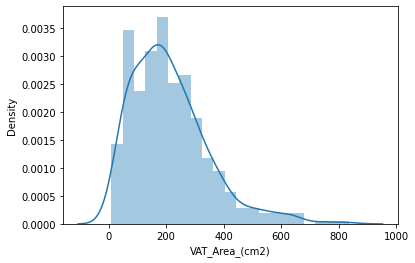

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


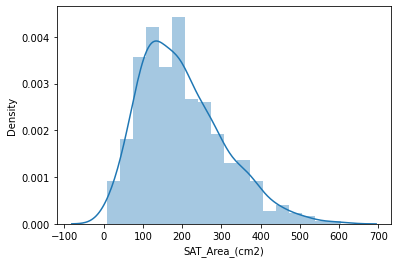

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


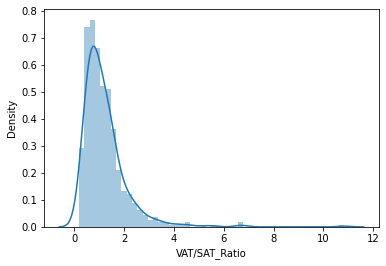

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


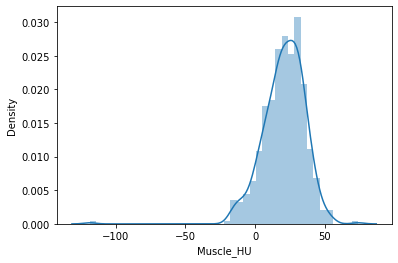

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


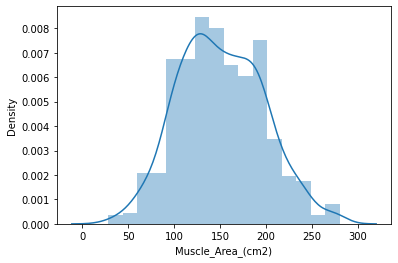

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


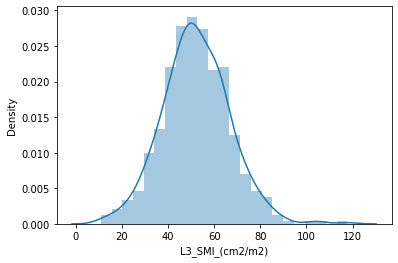

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


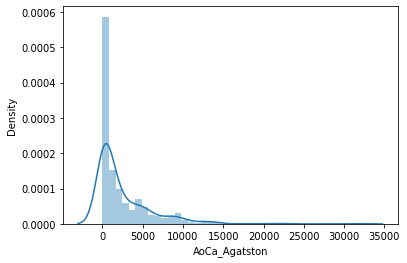

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


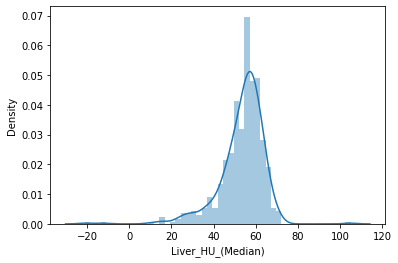

In [10]:
for col in CT_cols:
  sns.distplot(train_df[col], label=col)
  plt.show()

In [11]:
# cut AoCa_Agatston at 15000

col_AoCa_Agatston = 'AoCa_Agatston'
col_Liver_HU_Median = 'Liver_HU_(Median)'

train_df[col_AoCa_Agatston].clip(upper=15000, inplace=True)
train_df[col_Liver_HU_Median].clip(lower=0, upper=80, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:7249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
# calculate median values for all CT cols

fixed_train_df = train_df.copy()
for col in CT_cols:
  fixed_train_df.fillna(train_df[col].mean(), inplace=True)

mean_map = dict()
copy_mean_map = dict()

for col in CT_cols:
  mean_map[col] = train_df[col].mean()
  copy_mean_map[col] = fixed_train_df[col].mean()

pprint.pprint(mean_map)
pprint.pprint(copy_mean_map)

print('Not much change if we replace with mean')

{'AoCa_Agatston': 2411.062976320579,
 'L1_HU_BMD': 150.93394495412844,
 'L3_SMI_(cm2/m2)': 52.22252509011307,
 'Liver_HU_(Median)': 53.57089552238806,
 'Muscle_Area_(cm2)': 150.86536367976097,
 'Muscle_HU': 20.82390429670328,
 'SAT_Area_(cm2)': 199.00605851433696,
 'TAT_Area_(cm2)': 407.463576247073,
 'Total_Body_Area_EA_(cm2)': 721.2806478610561,
 'VAT/SAT_Ratio': 1.2203408526373185,
 'VAT_Area_(cm2)': 212.31717303825647}
{'AoCa_Agatston': 2411.062976320579,
 'L1_HU_BMD': 150.93394495412844,
 'L3_SMI_(cm2/m2)': 57.79639397132344,
 'Liver_HU_(Median)': 55.87639578215606,
 'Muscle_Area_(cm2)': 150.8657384408231,
 'Muscle_HU': 21.53488812543238,
 'SAT_Area_(cm2)': 197.60504974026895,
 'TAT_Area_(cm2)': 399.9873028396284,
 'Total_Body_Area_EA_(cm2)': 704.658521728978,
 'VAT/SAT_Ratio': 5.583578859238155,
 'VAT_Area_(cm2)': 210.52822650028563}
Not much change if we replace with mean


# Model - 1: Without Normalization

In [13]:
# Create Y with same biological age
X = fixed_train_df[CT_cols]
# TRY-1: change value so that everyone who died can be covered
# TRY-2: consider diff b/w CT date and Death Date into consideration for Y
Y = np.full(shape=(fixed_train_df.shape[0], 1), fill_value=80.0, dtype=float)

# Can't use bias else Theta vector will be Zero
# Attempt-1 without normalizing
reg = LinearRegression(fit_intercept=False).fit(X, Y)
# Y = Theta*X -> T0, T1-X1,T2-X2 



In [14]:
print(reg.coef_)

[[ 0.08272939 -0.1342564   0.08716572  0.02017849  0.09449926  0.14529392
   0.02455964  0.05911711  0.04257736  0.00101719  0.35743641]]


In [15]:
def plot_chrono_bio(chrono_age, bio_age):
  plt.plot(chrono_age, bio_age, 'o')
  plt.title('Chrono vs Bio Age')
  plt.xlabel('Chrono Age')
  plt.ylabel('Bio Age')
  plt.show()

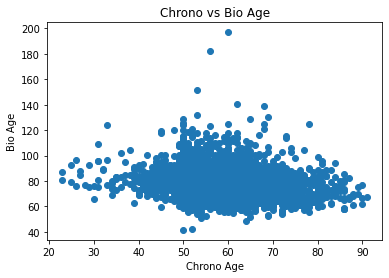

In [16]:
fixed_test_df = test_df.copy()
# fill test_df with median values, the same values that were used to fill train_data
for col in CT_cols:
  fixed_test_df.fillna(mean_map[col], inplace=True)

chrono_age = np.array(fixed_test_df['Age_at_CT'])
bio_age = reg.predict(fixed_test_df[CT_cols]).reshape(chrono_age.shape)

plot_chrono_bio(chrono_age, bio_age)

In [17]:
# check within each range
# print(bio_age.shape, chrono_age.shape)
# print(bio_age)
# print(chrono_age)

# zipped = np.column_stack((chrono_age, bio_age))

# for i in range(50, 100, 10):
#   print(f'from {i} to {i+10}')
#   filtered = zipped[((zipped[:,0] >= i) & (zipped[:,0] < i + 10))]
  
#   plot_chrono_bio(filtered[:, 0], filtered[:, 1])

# Model - 2: With normalization

In [18]:
# Transform the train DF and train the model
normalized_train_df = fixed_train_df.copy()

scaler = StandardScaler()
scaler.fit(normalized_train_df[CT_cols])

normalized_train_df = scaler.transform(normalized_train_df[CT_cols], copy=False)
print(normalized_train_df.shape)

reg2 = LinearRegression(fit_intercept=False).fit(normalized_train_df, Y)
print(reg2.coef_)

(549, 11)
[[ 1.67483878e-14 -2.10139625e-13 -1.46506791e-13  2.45308104e-13
   1.48160844e-13 -6.65504530e-14 -1.71362286e-15  2.62298237e-15
   9.19769239e-15 -5.90931266e-15 -2.32639644e-14]]


In [19]:
# Transform the test DF and test the model
transformed_test_df = fixed_test_df[CT_cols].copy()
transformed_test_df = scaler.transform(transformed_test_df, copy=True)

print(transformed_test_df.shape)

chrono_age_normalized = reg2.predict(transformed_test_df)
print(chrono_age_normalized.shape)



(8674, 11)
(8674, 1)


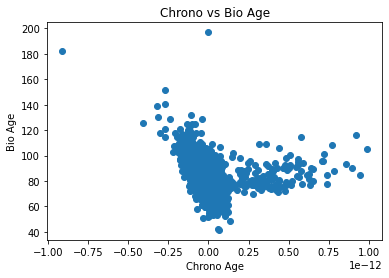

In [20]:
plot_chrono_bio(chrono_age =chrono_age_normalized, bio_age=bio_age)

# Model - 3 Use days instead of years

In [33]:
def plot_chrono_bio(chrono_age, bio_age):
  plt.plot(chrono_age, bio_age, 'o')
  plt.title('Chrono vs Bio Age')
  plt.xlabel('Chrono Age')
  plt.ylabel('Bio Age')
  plt.show()

def with_days(train_data, test_data, include_bias=True, max_bio_age=100, max_bio_subtract = 2000, decay_rate = 0.002):
  df_train = train_data.copy()
  C = max_bio_subtract
  K = decay_rate

  X = df_train[CT_cols]

  df_train['Decay_Days'] = df_train.apply(lambda row: 18 + C*(1 - np.exp(-K*row['DEATH_[d_from_CT]'])), axis=1)

  df_train['Bio_Age_AT_CT[DAYS]'] = df_train.apply(lambda row: max_bio_age*365 - row['Decay_Days'], axis=1)

  # print(df_train[['Age_at_CT', 'DEATH_[d_from_CT]','Bio_Age_AT_CT[DAYS]']])

  # Can't use bias else Theta vector will be Zero
  reg = LinearRegression(fit_intercept=include_bias).fit(X, df_train['Bio_Age_AT_CT[DAYS]'])

  # print(reg.coef_)

  df_test = test_data.copy()
  # fill test_df with median values, the same values that were used to fill train_data
  for col in CT_cols:
    df_test.fillna(mean_map[col], inplace=True)

  chrono_age = np.array(df_test['Age_at_CT'])
  bio_age = reg.predict(df_test[CT_cols]).reshape(chrono_age.shape)/365

  plot_chrono_bio(chrono_age, bio_age)

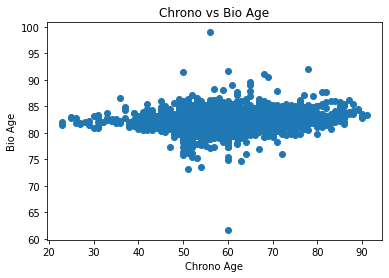

In [34]:
with_days(fixed_train_df, test_df, include_bias=True, max_bio_age=100, max_bio_subtract=8000, decay_rate = 0.001)
# with_days(fixed_train_df, test_df, include_bias=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


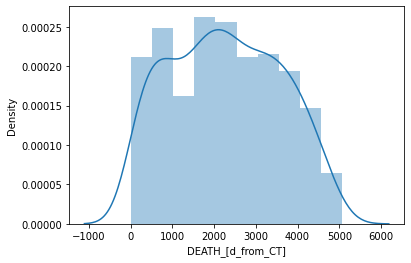

count     549.000000
mean     2268.253188
std      1314.409179
min         9.000000
25%      1154.000000
50%      2225.000000
75%      3347.000000
max      5070.000000
Name: DEATH_[d_from_CT], dtype: float64

In [35]:
sns.distplot(fixed_train_df['DEATH_[d_from_CT]'], label='DEATH_[d_from_CT]')
plt.show()

fixed_train_df['DEATH_[d_from_CT]'].describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


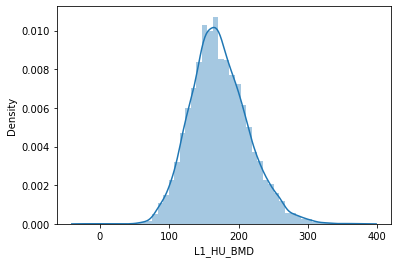

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


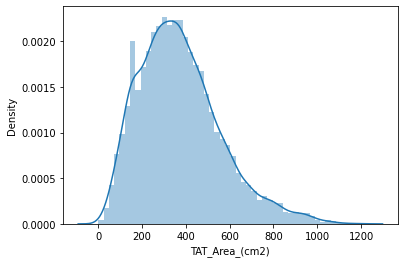

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


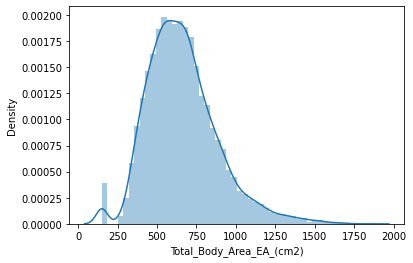

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


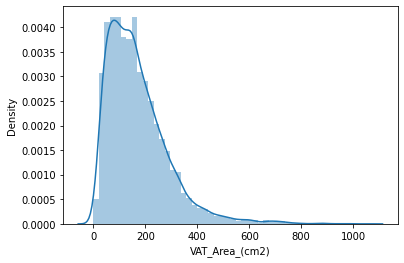

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


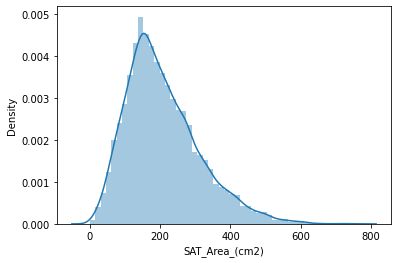

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


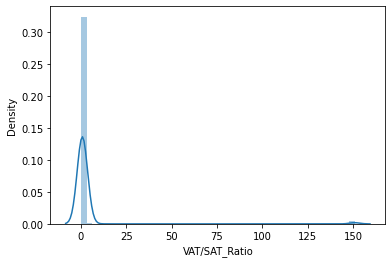

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


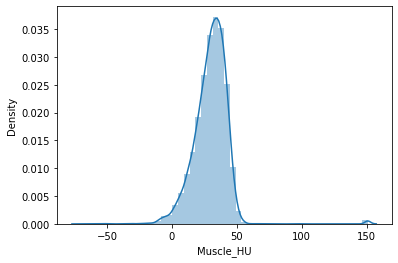

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


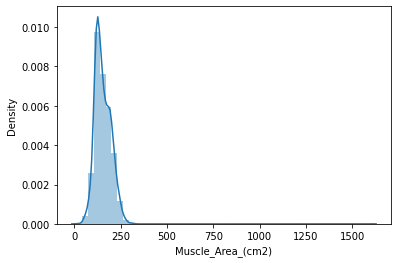

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


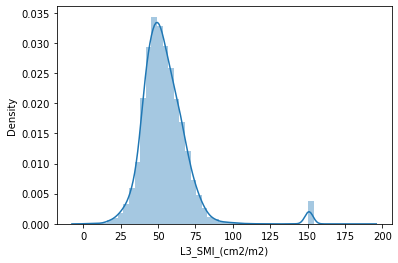

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


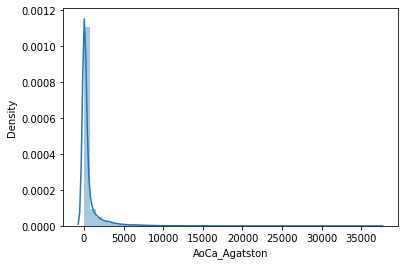

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


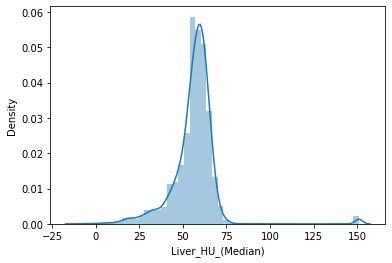

In [24]:
def check_test_df(test_df):
  test_data = test_df.copy()
  for col in CT_cols:
    test_data.fillna(mean_map[col], inplace=True)
    sns.distplot(test_data[col], label=col)
    plt.show()

check_test_df(test_df)

